<a href="https://colab.research.google.com/github/GianFederico/MD-repo-Computer_Vision/blob/main/HOG_descriptors_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

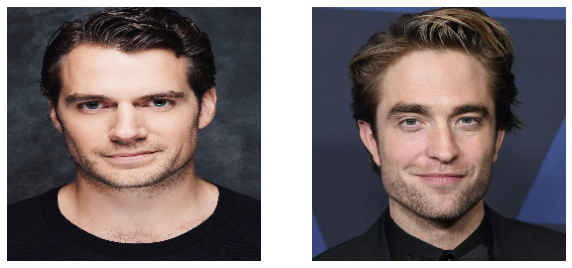

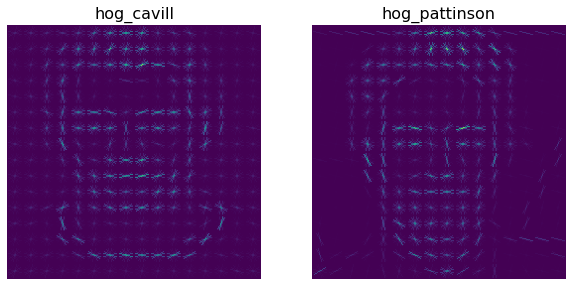



[[0.64114124]]


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from sklearn.metrics.pairwise import cosine_similarity

#reading, resizing and converting the images in grayscale
cavill=mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/assets/cavil.jpg')
cavill= cv2.resize(cavill, (256,256))
gray_cavill = cv2.cvtColor(cavill, cv2.COLOR_BGR2GRAY)

pattinson=mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/assets/pattinson.jpg')
pattinson= cv2.resize(pattinson, (256,256)) 
gray_pattinson = cv2.cvtColor(pattinson, cv2.COLOR_BGR2GRAY)

pics = [cavill, pattinson]
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
for ind, p in enumerate(pics):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()
print('\n')

#computing HOGdescritors 
fd, hog_cavill = hog(gray_cavill, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, feature_vector=True)

fd, hog_pattinson = hog(gray_pattinson, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, feature_vector=True)

images = [hog_cavill, hog_pattinson]
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
axs[0].set_title('hog_cavill', fontsize=16)
axs[1].set_title('hog_pattinson', fontsize=16)
plt.show()
print('\n')

#computing consine similarity between reshaped HOGdescriptors
cos_sim = cosine_similarity(hog_cavill.reshape(1,-1), hog_pattinson.reshape(1,-1))
print(cos_sim)